# Aprendizaje neuronal de las señales de tráfico

In [1]:
import tensorflow as tf
import os
import skimage.data as imd
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import transform
from skimage.color import rgb2gray

In [2]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory, d))]
    
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
        
    return images, labels

In [3]:
main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [4]:
images, labels = load_ml_data(train_data_dir)

In [5]:
len(images)

4575

In [6]:
len(labels)

4575

In [7]:
type(images)

list

In [8]:
images = np.array(images)

In [9]:
labels = np.array(labels)

In [10]:
images[0]

array([[[ 47,  52,  59],
        [ 35,  64,  72],
        [ 53, 104, 112],
        ...,
        [ 75,  82,  60],
        [ 72,  77,  55],
        [ 68,  71,  50]],

       [[ 46,  51,  57],
        [ 38,  66,  74],
        [ 58, 109, 115],
        ...,
        [ 74,  84,  62],
        [ 76,  84,  62],
        [ 76,  83,  61]],

       [[ 44,  50,  56],
        [ 44,  71,  79],
        [ 59, 109, 115],
        ...,
        [ 71,  83,  61],
        [ 74,  84,  63],
        [ 75,  84,  63]],

       ...,

       [[120, 141, 139],
        [119, 144, 138],
        [114, 141, 131],
        ...,
        [ 33,  30,  27],
        [ 32,  30,  28],
        [ 30,  30,  28]],

       [[133, 151, 145],
        [124, 146, 138],
        [111, 137, 127],
        ...,
        [ 31,  30,  25],
        [ 32,  32,  27],
        [ 33,  33,  30]],

       [[139, 158, 147],
        [124, 146, 137],
        [107, 132, 123],
        ...,
        [ 31,  30,  23],
        [ 33,  33,  27],
        [ 35,  36,  31]]

In [11]:
len(set(labels))

62

In [12]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

<function matplotlib.pyplot.show>

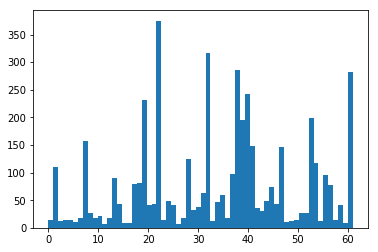

In [13]:
plt.hist(labels, len(set(labels)))
plt.show

In [14]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[3918, 264, 3478, 3050, 2389, 2655]

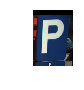

Forma: (315, 224, 3), min: 0, max: 250


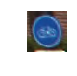

Forma: (45, 43, 3), min: 4, max: 255


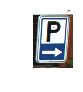

Forma: (230, 158, 3), min: 0, max: 255


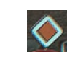

Forma: (58, 55, 3), min: 20, max: 250


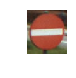

Forma: (70, 63, 3), min: 18, max: 239


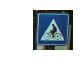

Forma: (121, 120, 3), min: 2, max: 233


In [15]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(images[rand_signs[i]])
    plt.subplots_adjust(wspace = 0.5)    
    plt.show()
    print("Forma: {0}, min: {1}, max: {2}".format(temp_im.shape,
                                                 temp_im.min(),
                                                 temp_im.max()))

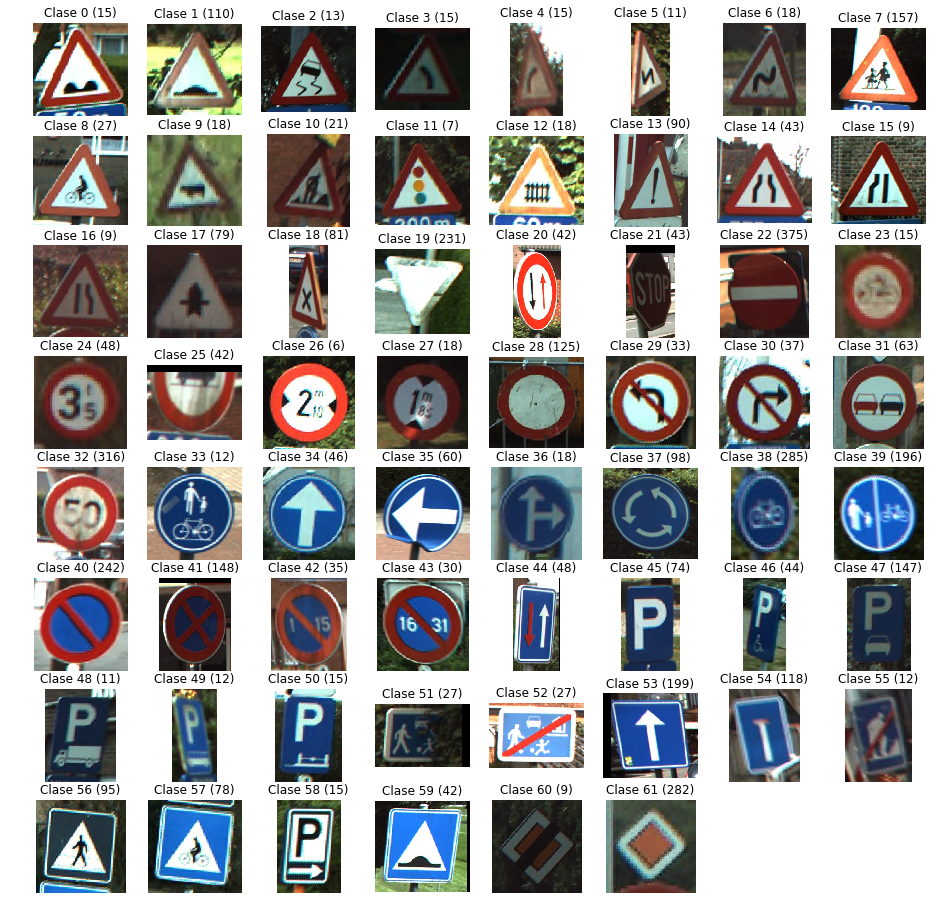

In [16]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))

i = 1

for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i += 1
    plt.imshow(temp_im)

plt.show()

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no son todas del mismo tamaño
* Hay 62 clases de imágenes
* La distribución de señales de tráfico no es uniforme

In [17]:
w = 9999
h = 9999

for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
        
    if image.shape[1] < w:
        w = image.shape[1]
        
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


In [18]:
images30 = [transform.resize(image, (30,30)) for image in images]

/Users/joaquin/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [19]:
images30[0]

array([[[0.22186275, 0.40480392, 0.4295098 ],
        [0.42978431, 0.54390196, 0.53941176],
        [0.44313725, 0.54921569, 0.53343137],
        ...,
        [0.26784314, 0.29166667, 0.2227451 ],
        [0.2385098 , 0.26913725, 0.19303922],
        [0.28131373, 0.32641176, 0.24066667]],

       [[0.21217647, 0.39062745, 0.40141176],
        [0.43011765, 0.55227451, 0.54468627],
        [0.44098039, 0.53431373, 0.49598039],
        ...,
        [0.3272549 , 0.34117647, 0.27245098],
        [0.29258824, 0.32743137, 0.24454902],
        [0.28129412, 0.32186275, 0.23892157]],

       [[0.26254902, 0.45235294, 0.47558824],
        [0.45901961, 0.58      , 0.55627451],
        [0.45882353, 0.5377451 , 0.51421569],
        ...,
        [0.35686275, 0.31421569, 0.25343137],
        [0.34009804, 0.29872549, 0.25539216],
        [0.33205882, 0.30039216, 0.27931373]],

       ...,

       [[0.39833333, 0.52656863, 0.50019608],
        [0.42921569, 0.55666667, 0.52352941],
        [0.43676471, 0

In [20]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

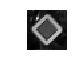

Forma: (30, 30), min: 0.048540912091503324, max: 0.7700891192810384


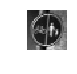

Forma: (30, 30), min: 0.06963613071895436, max: 0.45937203485838773


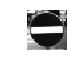

Forma: (30, 30), min: 0.1269423137254895, max: 1.0


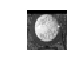

Forma: (30, 30), min: 0.0, max: 0.6616011819172117


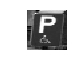

Forma: (30, 30), min: 0.07574257516339863, max: 0.956998163398693


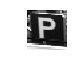

Forma: (30, 30), min: 0.12766483834422662, max: 1.0


In [21]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)    
    plt.show()
    print("Forma: {0}, min: {1}, max: {2}".format(temp_im.shape,
                                                 temp_im.min(),
                                                 temp_im.max()))

In [25]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30, 30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

train_opt = tf.train.AdamOptimizer(learning_rate = 0.001). minimize(loss)

final_pred = tf.argmax(logits, 1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [27]:
images_flat

<tf.Tensor 'Flatten_3/Reshape:0' shape=(?, 900) dtype=float32>

In [28]:
logits

<tf.Tensor 'fully_connected_3/Relu:0' shape=(?, 62) dtype=float32>

In [29]:
loss

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [30]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [85]:
tf.set_random_seed(1234)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(600):
    _, accuracy_val = sess.run([train_opt, accuracy], feed_dict = {
        x: images30,
        y: list(labels)})
    
    #_, loss_val = sess.run([train_opt, loss], feed_dict = {
     #   x: images30,
      #  y: list(labels)})
    
    if i%50 == 0:
        print("EPOCH ", i)
        print("Eficacia: ", accuracy_val)
        #print("Perdidas: ", loss_val)

EPOCH  0
Eficacia:  49.822952
EPOCH  50
Eficacia:  34.53727
EPOCH  100
Eficacia:  34.654865
EPOCH  150
Eficacia:  34.664043
EPOCH  200
Eficacia:  34.68634
EPOCH  250
Eficacia:  34.59672
EPOCH  300
Eficacia:  34.524372
EPOCH  350
Eficacia:  34.45115
EPOCH  400
Eficacia:  34.39213
EPOCH  450
Eficacia:  34.41399
EPOCH  500
Eficacia:  34.35672
EPOCH  550
Eficacia:  34.31891


# Evaluación de la Red Neuronal

In [86]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [87]:
sample_labels

[42,
 37,
 61,
 61,
 38,
 47,
 40,
 31,
 37,
 52,
 32,
 35,
 1,
 40,
 14,
 38,
 1,
 44,
 32,
 34,
 9,
 31,
 54,
 46,
 25,
 39,
 29,
 37,
 39,
 54,
 38,
 38,
 22,
 54,
 38,
 1,
 48,
 7,
 54,
 7]

In [88]:
sample_images

[array([[0.3541731 , 0.35258637, 0.34725922, 0.35910783, 0.34891871,
         0.35497528, 0.36532876, 0.35239657, 0.35760116, 0.36346377,
         0.37847434, 0.37242773, 0.35766879, 0.3587203 , 0.36535954,
         0.36247725, 0.38008568, 0.36321032, 0.36118119, 0.35944084,
         0.35591055, 0.3534419 , 0.34719254, 0.34255846, 0.37890619,
         0.36193575, 0.35040476, 0.35676942, 0.3789216 , 0.35979927],
        [0.34620113, 0.37564567, 0.34843695, 0.36456507, 0.36557926,
         0.37821717, 0.38554501, 0.37549835, 0.38914067, 0.3839079 ,
         0.39933339, 0.39303415, 0.39155482, 0.42522742, 0.41878607,
         0.38352515, 0.37601766, 0.37920283, 0.38473471, 0.37689118,
         0.35532207, 0.35892515, 0.36932364, 0.36465763, 0.37201948,
         0.34982565, 0.36584818, 0.34353202, 0.35323612, 0.34769713],
        [0.35527655, 0.34115362, 0.35963459, 0.3765213 , 0.35783025,
         0.36134631, 0.38917766, 0.37340946, 0.38829929, 0.43149471,
         0.74114808, 0.95358775,

In [89]:
prediction = sess.run([final_pred], feed_dict = {x:sample_images})[0]

In [90]:
prediction

array([40, 61, 61, 61, 38, 47, 40, 31, 32, 39, 32, 35,  1, 40,  7, 38,  1,
       61, 32, 53, 18, 31, 54, 46, 32, 39, 32, 40, 39, 54, 38, 38, 22, 54,
       38,  1, 47,  7, 54,  7])

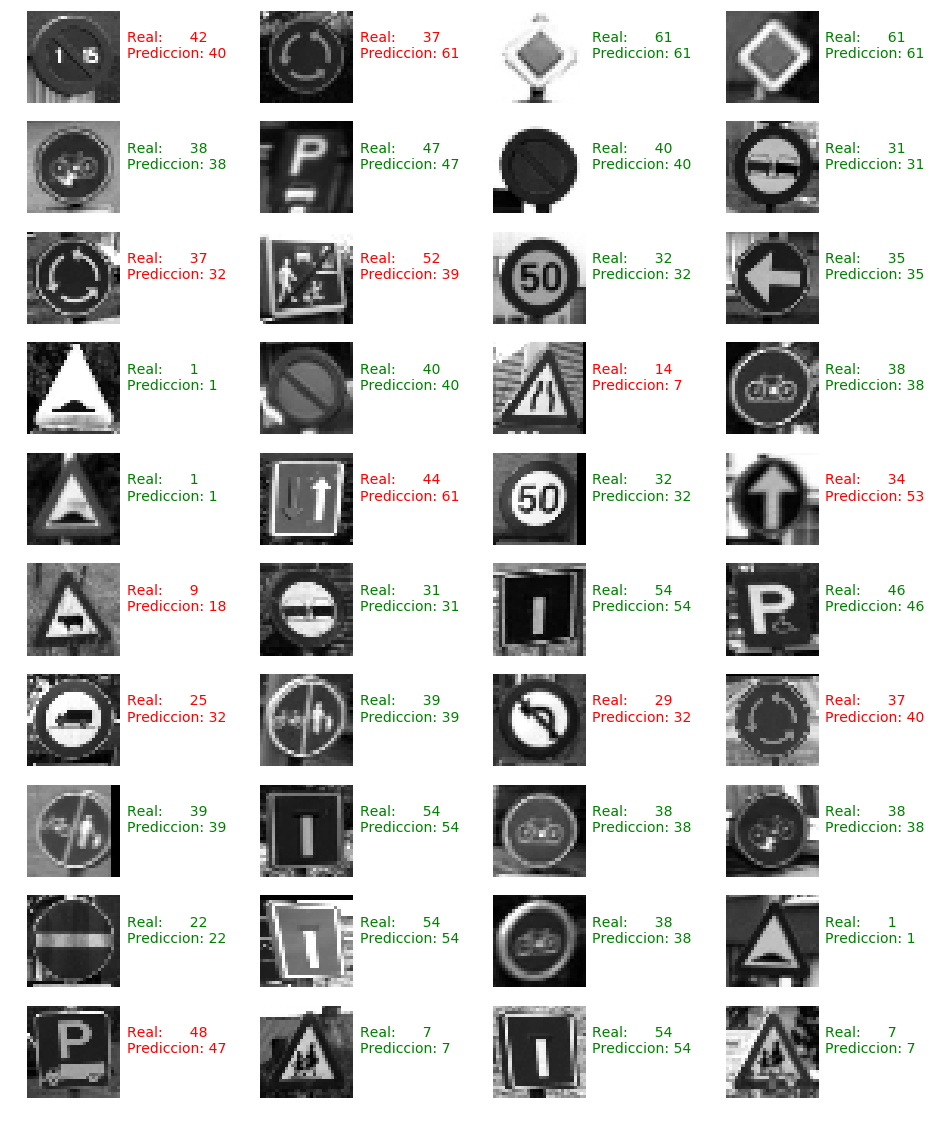

In [91]:
plt.figure(figsize=(16, 20))

for i in range(len(sample_images)):
    truth = sample_labels[i]
    predic = prediction[i]
    
    plt.subplot(10, 4, i+1)
    plt.axis("off")
    color = "green" if truth == predic else "red"
    plt.text(32, 15, "Real:      {0}\nPrediccion: {1}".format(truth, predic),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap = "gray")
    
plt.show()

In [92]:
test_images, test_labels = load_ml_data(test_data_dir)

In [93]:
test_images30 = [transform.resize(im, (30, 30)) for im in test_images]

/Users/joaquin/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [94]:
test_images30 = rgb2gray(np.array(test_images30))

In [95]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [96]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1814

In [97]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red: ", acc)

Eficacia de la red:  71.98412698412699
